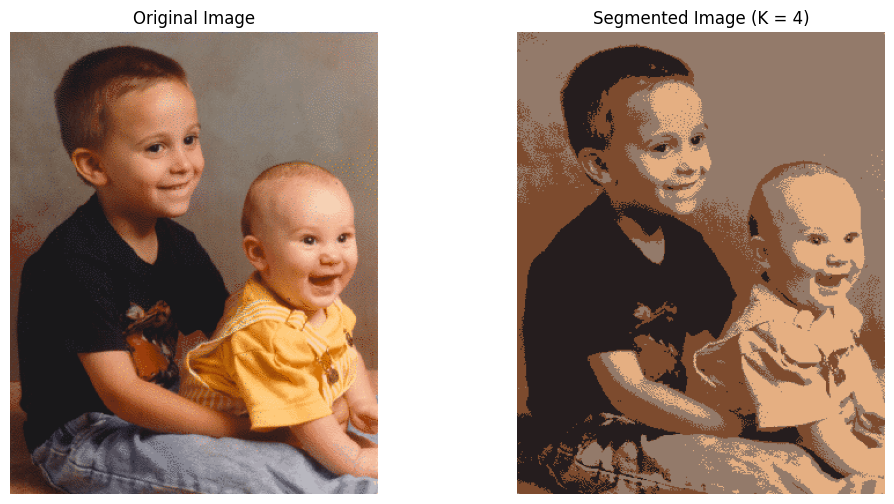

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:\\Users\\HP\\Downloads\\Standard Images\\kids.tif')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

# Reshape the image to a 2D array of pixels (each pixel is [R, G, B])
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float32 for kmeans

# Define criteria and number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4  # Number of color clusters
attempts = 10  # Number of times the algorithm is executed using different initial labellings

# Apply KMeans clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

# Convert cluster centers back to 8-bit values
centers = np.uint8(centers)

# Map each pixel to the centroid of its cluster to get the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (K = {})'.format(k))
plt.imshow(segmented_image)
plt.axis('off')

plt.show()